In [1]:
# Note : All the experiments conducted uses the similar variable names in the model experimentation so it is necessary to run the traning and
# testing cell of the models respective models before checking the model performance.

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# FIX ME: Root dir as argument
root_dir = "../../data/picklerCheckpoints/"
is_compressed = True;


In [3]:
import numpy as np
import pandas as pd
import nbimporter
import geopandas as gpd
import commons.utility.pickle_util as pickle
import Preprocessing.DataEnrichment as de
import Preprocessing.SpatialMapping as sm
import Preprocessing.Discretization as dis
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import time

coord_system = {'init': 'epsg:4326'}

ModuleNotFoundError: No module named 'geopandas'

In [3]:
month = ['apr','may','jun','jul','aug']

data = sm.run(month)

Data for the month :apr Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-apr14.p


C:\Users\spkri\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-apr14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :may Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-may14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-may14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :jun Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jun14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jun14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++

In [4]:
data

,Date/Time,Lat,Lon,Base,datetime,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,geometry,index_right,zone,LocationID,borough,borough_categ
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,04-01-2014:00,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday,POINT (-73.95490 40.76900),42.0,Central Park,43.0,Manhattan,3.0
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,04-01-2014:00,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday,POINT (-73.95490 40.76900),139.0,Lenox Hill East,140.0,Manhattan,3.0
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,04-01-2014:00,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday,POINT (-73.95490 40.76900),140.0,Lenox Hill West,141.0,Manhattan,3.0
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,04-01-2014:00,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday,POINT (-73.95490 40.76900),201.0,Roosevelt Island,202.0,Manhattan,3.0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,04-01-2014:00,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday,POINT (-73.98730 40.73160),78.0,East Village,79.0,Manhattan,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,08-31-2014:23,mist,88.0,1015.0,298.53,0.0,2.0,weekend,POINT (-73.98890 40.73950),106.0,Gramercy,107.0,Manhattan,3.0
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,08-31-2014:23,mist,88.0,1015.0,298.53,0.0,2.0,weekend,POINT (-73.98890 40.73950),233.0,Union Sq,234.0,Manhattan,3.0
829274,8/31/2014 23:59:00,40.7270,-73.9802,B02764,08-31-2014:23,mist,88.0,1015.0,298.53,0.0,2.0,weekend,POINT (-73.98020 40.72700),3.0,Alphabet City,4.0,Manhattan,3.0
829274,8/31/2014 23:59:00,40.7270,-73.9802,B02764,08-31-2014:23,mist,88.0,1015.0,298.53,0.0,2.0,weekend,POINT (-73.98020 40.72700),78.0,East Village,79.0,Manhattan,3.0


In [5]:
# data preperation
data_set = data[['Date/Time','datetime', 'zone', 'borough', 'weatherCondition', 'humidity', 'pressure', 'temperature', 'windDirection', 'windSpeed', 'holiday']]

In [6]:
data_set

,Date/Time,datetime,zone,borough,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday
0,4/1/2014 0:11:00,04-01-2014:00,Central Park,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
0,4/1/2014 0:11:00,04-01-2014:00,Lenox Hill East,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
0,4/1/2014 0:11:00,04-01-2014:00,Lenox Hill West,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
0,4/1/2014 0:11:00,04-01-2014:00,Roosevelt Island,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
2,4/1/2014 0:21:00,04-01-2014:00,East Village,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
...,...,...,...,...,...,...,...,...,...,...,...
829273,8/31/2014 23:59:00,08-31-2014:23,Gramercy,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend
829273,8/31/2014 23:59:00,08-31-2014:23,Union Sq,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend
829274,8/31/2014 23:59:00,08-31-2014:23,Alphabet City,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend
829274,8/31/2014 23:59:00,08-31-2014:23,East Village,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend


In [7]:
# trip count based on day using single month and single feature ('Date-Time') - experiment 1

In [8]:
df = pd.DataFrame()

df['datetime'] = pd.to_datetime(data_set['datetime'], format='%m-%d-%Y:%H').apply(lambda x: time.mktime(x.timetuple()))

In [9]:
df['datetime'].value_counts()

1.405440e+09    6859
1.402675e+09    6660
1.405444e+09    6618
1.405436e+09    6436
1.400260e+09    6399
                ... 
1.396829e+09     109
1.396397e+09     109
1.399248e+09     108
1.397434e+09      94
1.397430e+09      88
Name: datetime, Length: 3634, dtype: int64

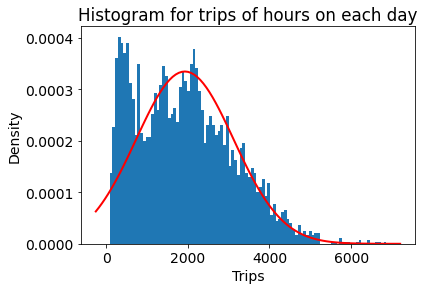

In [10]:
# density estimate of trips based on days 

from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import matplotlib.pyplot as plt

unique_date_hours = df['datetime'].unique()
trip_date_hours = df['datetime'].value_counts()

sample_trip_date_hours = np.array(trip_date_hours).reshape(-1,1)
mu, std = norm.fit(sample_trip_date_hours)

plt.rcParams.update({'font.size': 14})
plt.hist(sample_trip_date_hours,density=True,bins=100)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='r')
plt.title("Histogram for trips of hours on each day")
plt.xlabel("Trips")
plt.ylabel("Density")

plt.show()


In [11]:
# Gaussian mixture of day based of hours on days 

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:06<00:00,  9.04it/s]


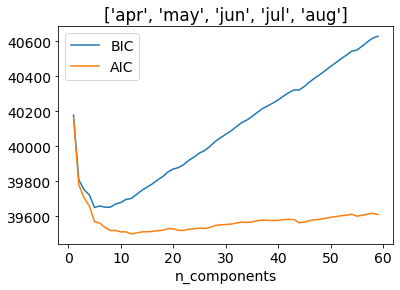

In [12]:
# mixture of gaussians on trips based on days
# AIC - BIC evaluation

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from tqdm import tqdm

#  hours on each day vs trips
# using the hours and trips on the hours as the features

x_train,x_test,y_train,y_test = train_test_split(trip_date_hours,unique_date_hours, test_size=0.33,shuffle=False)

x_train = np.array([[x] for x in x_train])
x_test = np.array([[x] for x in x_test])

plt.rcParams.update({'font.size': 14})
# find best components
n_components = np.arange(1, 60)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(x_train)
          for n in tqdm(n_components)]

plt.plot(n_components, [m.bic(x_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.title(month)
plt.xlabel('n_components');
    

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:20<00:00,  2.83it/s]


Text(0, 0.5, 'score')

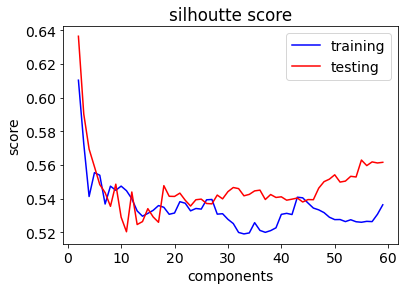

In [13]:
# Training and Testing evaluation

from sklearn.metrics import silhouette_score

x_train,x_test,y_train,y_test = train_test_split(trip_date_hours,unique_date_hours, test_size=0.33,shuffle=False)
x_train = np.array([[x] for x in x_train])
x_test = np.array([[x] for x in x_test])

n_components = np.arange(2,60)
train_score = []
test_score = []
for cmp in tqdm(n_components):
    model = GaussianMixture(n_components=cmp,covariance_type='full',max_iter=100,random_state=42)
    train_score.append(silhouette_score(x_train, model.fit_predict(x_train)))
    test_score.append(silhouette_score(x_test, model.fit_predict(x_test)))

 
plt.plot(n_components,train_score,color='b')
plt.plot(n_components,test_score,color='r')
plt.legend(["training","testing"])
plt.title(f"silhoutte score")
plt.xlabel('components')
plt.ylabel('score')

(2434,)
(1200,)


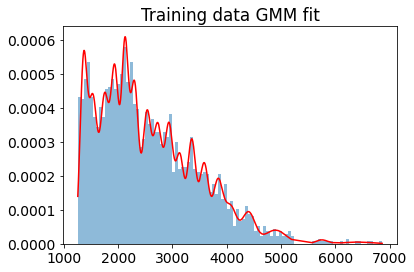

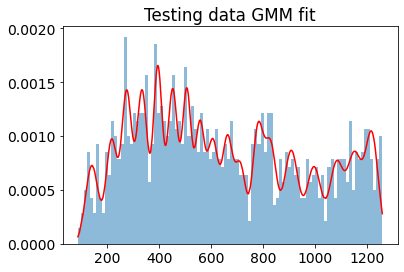

Training score : 0.5347855973524527
Testing score : 0.5476447041212289


In [14]:
# GMM - model 1

x_train,x_test,y_train,y_test = train_test_split(trip_date_hours,unique_date_hours, test_size=0.33,shuffle=False)

print(np.shape(y_train))
print(np.shape(y_test))

x_train = np.array([[x] for x in x_train])
x_test = np.array([[x] for x in x_test])

# GM model
model = GaussianMixture(n_components=18,covariance_type='full',max_iter=100,random_state=42)
model.fit(x_train)


# training plot
model.fit_predict(x_train)
density = np.exp(model.score_samples(x_train))
plt.hist(x_train, 100, density=True, alpha=0.5)
plt.plot(x_train, density, '-r')
plt.title("Training data GMM fit")
plt.show()

# testing plot 
model.fit_predict(x_test)
density = np.exp(model.score_samples(x_test))
plt.hist(x_test, 100, density=True, alpha=0.5)
plt.plot(x_test, density, '-r')
plt.title("Testing data GMM fit")
plt.show()

from sklearn.metrics import accuracy_score,silhouette_score 

print(f"Training score : {silhouette_score(x_train, model.fit_predict(x_train))}")
print(f"Testing score : {silhouette_score(x_test, model.fit_predict(x_test))}")

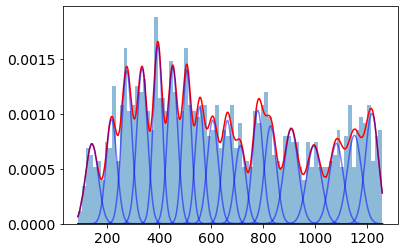

In [15]:
# density and pdf plots 

model.means_
model.n_components
model.weights_
model.precisions_

from scipy import stats

plt.hist(x_test, 80, density=True, alpha=0.5)
#xmin, xmax = plt.xlim()
plt.plot(x_test, density, '-r')

for i in range(model.n_components):
    pdf = model.weights_[i] * stats.norm(model.means_[i, 0],
                                       np.sqrt(model.covariances_[i, 0])).pdf(x_test)
    plt.plot(x_test, pdf,
             color='b', alpha=0.5)

In [16]:
# trip count based on day using single month with borugh and zones single features - experiment 2 

In [17]:
df2 = pd.DataFrame({
    'datetime_converted':pd.to_datetime(data['datetime'], format='%m-%d-%Y:%H').apply(lambda x: time.mktime(x.timetuple())),
    'datetime':data['datetime'],
    'zone': data['zone'],
    'borough':data['borough'], 
    'weatherCondition':data['weatherCondition'], 
    'humidity':data['humidity'], 
    'pressure':data['pressure'], 
    'temperature':data['temperature'], 
    'windDirection':data['windDirection'], 
    'windSpeed':data[ 'windSpeed'], 
    'holiday':data['holiday']
    
})


In [18]:
#df2

In [19]:
columns = ['datetime_converted', 'zone', 'borough']

df2_converted = dis.encode(df2, ['zone', 'borough'])
df2_converted = df2.groupby(columns).size().reset_index(name='counts')

Result Saved in ../data/encodedMappings/zone.p
Result Saved in ../data/encodedMappings/borough.p


In [20]:
df2_converted

,datetime_converted,zone,borough,counts
0,1.396303e+09,10,3,3
1,1.396303e+09,11,1,1
2,1.396303e+09,14,1,2
3,1.396303e+09,22,1,1
4,1.396303e+09,25,4,1
...,...,...,...,...
486661,1.409519e+09,251,1,3
486662,1.409519e+09,254,4,5
486663,1.409519e+09,255,3,7
486664,1.409519e+09,256,3,6


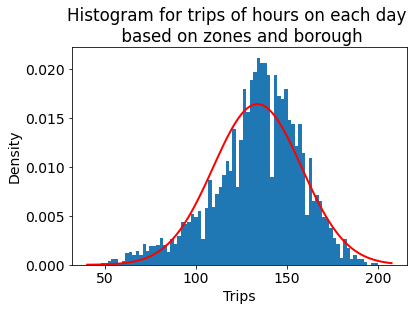

In [21]:
# density estimate of trips based on days 

from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import matplotlib.pyplot as plt

unique_date_hours = df2_converted['datetime_converted'].unique()
trip_date_hours = df2_converted['datetime_converted'].value_counts()

sample_trip_date_hours = np.array(trip_date_hours).reshape(-1,1)
mu, std = norm.fit(sample_trip_date_hours)

plt.rcParams.update({'font.size': 14})
plt.hist(sample_trip_date_hours,density=True,bins=80)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='r')
plt.title("Histogram for trips of hours on each day \n based on zones and borough")
plt.xlabel("Trips")
plt.ylabel("Density")
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:05<00:00, 11.43it/s]


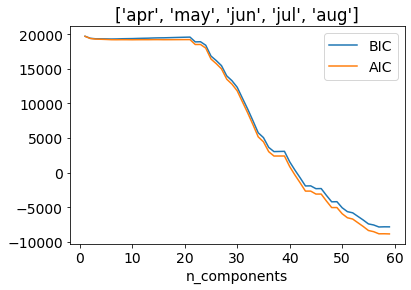

In [22]:
# AIC and BIC analysis

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from tqdm import tqdm

#  hours on each day vs trips
# using the hours and trips on the hours as the features

x_train,x_test,y_train,y_test = train_test_split(trip_date_hours,unique_date_hours, test_size=0.33,shuffle=False)

x_train = np.array([[x] for x in x_train])
x_test = np.array([[x] for x in x_test])
plt.rcParams.update({'font.size': 14})

# find best components
n_components = np.arange(1, 60)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(x_train)
          for n in tqdm(n_components)]

plt.plot(n_components, [m.bic(x_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.title(month)
plt.xlabel('n_components');

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:23<00:00,  2.49it/s]


Text(0, 0.5, 'score')

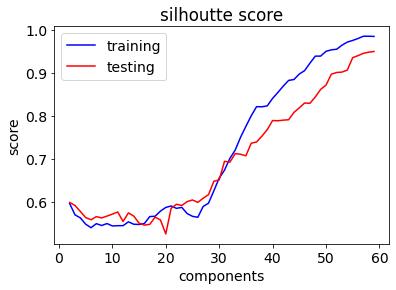

In [23]:
# Traning and Testing data

from sklearn.metrics import silhouette_score

x_train,x_test,y_train,y_test = train_test_split(trip_date_hours,unique_date_hours, test_size=0.33,shuffle=False)
x_train = np.array([[x] for x in x_train])
x_test = np.array([[x] for x in x_test])

n_components = np.arange(2,60)
train_score = []
test_score = []
for cmp in tqdm(n_components):
    model = GaussianMixture(n_components=cmp,covariance_type='full',max_iter=100,random_state=42).fit(x_train)

    train_score.append(silhouette_score(x_train, model.fit_predict(x_train)))
    test_score.append(silhouette_score(x_test, model.fit_predict(x_test)))

 
plt.plot(n_components,train_score,color='b')
plt.plot(n_components,test_score,color='r')
plt.legend(["training","testing"])
plt.title(f"silhoutte score")
plt.xlabel('components')
plt.ylabel('score')

(2907,)
(727,)


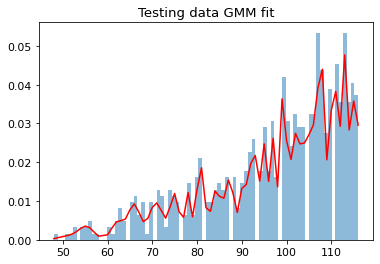

Training score : 0.579479670419956
Testing score : 0.6192055376727086


In [26]:
# GMM - model 2
from scipy.stats import norm
x_train,x_test,y_train,y_test = train_test_split(trip_date_hours,unique_date_hours, test_size=0.2,shuffle=False)

print(np.shape(y_train))
print(np.shape(y_test))

x_train = np.array([[x] for x in x_train])
x_test = np.array([[x] for x in x_test])

# GM model
model = GaussianMixture(n_components=22,covariance_type='full',max_iter=100,random_state=42)
model.fit(x_train)

# testing plot 
model.fit_predict(x_test)
density = np.exp(model.score_samples(x_test))
plt.hist(x_test, 80, density=True, alpha=0.5)
plt.plot(x_test, density, '-r')
plt.title("Testing data GMM fit")
plt.show()

from sklearn.metrics import accuracy_score,silhouette_score 

print(f"Training score : {silhouette_score(x_train, model.fit_predict(x_train))}")
print(f"Testing score : {silhouette_score(x_test, model.fit_predict(x_test))}")

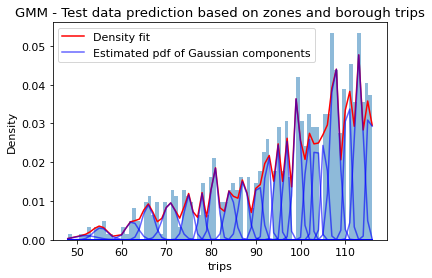

In [27]:
# density and pdf plot

model.means_
model.n_components
model.weights_
model.precisions_

from scipy import stats
plt.hist(x_test, 80, density=True, alpha=0.5)
#xmin, xmax = plt.xlim()
plt.plot(x_test, density, '-r')
plt.rcParams.update({'font.size': 11})

for i in range(model.n_components):
    pdf = model.weights_[i] * stats.norm(model.means_[i, 0],
                                       np.sqrt(model.covariances_[i, 0])).pdf(x_test)
    plt.plot(x_test, pdf,color='b', alpha=0.6)
    #plt.fill(x_test, pdf, facecolor='gray', edgecolor='b', alpha=0.5)

plt.title("GMM - Test data prediction based on zones and borough trips")
plt.xlabel("trips")
plt.ylabel("Density")
plt.legend(["Density fit","Estimated pdf of Gaussian components"])

In [46]:
# trip count based on day using single month with borugh and zones multiple features - experiment 3

In [27]:
df3 = pd.DataFrame({
    'datetime_converted':pd.to_datetime(data['datetime'], format='%m-%d-%Y:%H').apply(lambda x: time.mktime(x.timetuple())),
    'datetime':data['datetime'],
    'zone': data['zone'],
    'borough':data['borough'], 
    'weatherCondition':data['weatherCondition'], 
    'humidity':data['humidity'], 
    'pressure':data['pressure'], 
    'temperature':data['temperature'], 
    'windDirection':data['windDirection'], 
    'windSpeed':data[ 'windSpeed'], 
    'holiday':data['holiday']
    
})

In [28]:
df3

,datetime_converted,datetime,zone,borough,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday
0,1.396303e+09,04-01-2014:00,Central Park,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
0,1.396303e+09,04-01-2014:00,Lenox Hill East,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
0,1.396303e+09,04-01-2014:00,Lenox Hill West,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
0,1.396303e+09,04-01-2014:00,Roosevelt Island,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
2,1.396303e+09,04-01-2014:00,East Village,Manhattan,scattered clouds,40.0,1016.0,282.96,330.0,5.0,weekday
...,...,...,...,...,...,...,...,...,...,...,...
829273,1.409519e+09,08-31-2014:23,Gramercy,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend
829273,1.409519e+09,08-31-2014:23,Union Sq,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend
829274,1.409519e+09,08-31-2014:23,Alphabet City,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend
829274,1.409519e+09,08-31-2014:23,East Village,Manhattan,mist,88.0,1015.0,298.53,0.0,2.0,weekend


In [29]:
columns = ['datetime_converted', 'zone', 'borough','weatherCondition', 'humidity', 'pressure', 'temperature', 'windDirection', 'windSpeed', 'holiday']

df3_converted = dis.encode(df3, ['zone', 'borough','weatherCondition', 'holiday'])
#df3_converted = df3.groupby(columns).size().reset_index(name='counts')

Result Saved in ../data/encodedMappings/zone.p
Result Saved in ../data/encodedMappings/borough.p
Result Saved in ../data/encodedMappings/weatherCondition.p
Result Saved in ../data/encodedMappings/holiday.p


In [30]:
df3_converted

,datetime_converted,datetime,zone,borough,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday
0,1.396303e+09,04-01-2014:00,40,3,15,40.0,1016.0,282.96,330.0,5.0,1
0,1.396303e+09,04-01-2014:00,134,3,15,40.0,1016.0,282.96,330.0,5.0,1
0,1.396303e+09,04-01-2014:00,135,3,15,40.0,1016.0,282.96,330.0,5.0,1
0,1.396303e+09,04-01-2014:00,196,3,15,40.0,1016.0,282.96,330.0,5.0,1
2,1.396303e+09,04-01-2014:00,75,3,15,40.0,1016.0,282.96,330.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
829273,1.409519e+09,08-31-2014:23,101,3,10,88.0,1015.0,298.53,0.0,2.0,2
829273,1.409519e+09,08-31-2014:23,228,3,10,88.0,1015.0,298.53,0.0,2.0,2
829274,1.409519e+09,08-31-2014:23,1,3,10,88.0,1015.0,298.53,0.0,2.0,2
829274,1.409519e+09,08-31-2014:23,75,3,10,88.0,1015.0,298.53,0.0,2.0,2


In [31]:
df3_converted = df3.groupby(columns).size().reset_index(name='counts')

In [32]:
df3_converted

,datetime_converted,zone,borough,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,counts
0,1.396303e+09,10,3,15,40.0,1016.0,282.96,330.0,5.0,1,3
1,1.396303e+09,11,1,15,40.0,1016.0,282.96,330.0,5.0,1,1
2,1.396303e+09,14,1,15,40.0,1016.0,282.96,330.0,5.0,1,2
3,1.396303e+09,22,1,15,40.0,1016.0,282.96,330.0,5.0,1,1
4,1.396303e+09,25,4,15,40.0,1016.0,282.96,330.0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
486661,1.409519e+09,251,1,10,88.0,1015.0,298.53,0.0,2.0,2,3
486662,1.409519e+09,254,4,10,88.0,1015.0,298.53,0.0,2.0,2,5
486663,1.409519e+09,255,3,10,88.0,1015.0,298.53,0.0,2.0,2,7
486664,1.409519e+09,256,3,10,88.0,1015.0,298.53,0.0,2.0,2,6


In [35]:
from sklearn.preprocessing import MinMaxScaler
counts = df3_converted['counts'].copy()
datetime = df3_converted['datetime_converted'].copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df3_converted) 
df3_converted.loc[:,:] = scaled_values
df3_converted['counts'] = counts
df3_converted['datetime_converted'] = datetime

In [36]:
bins = [0, 10, 50, 'NAN']
names = ['low', 'med', 'high']

df3_converted['label'] = pd.cut(df3_converted['counts'], bins, labels=names)

df3_converted = dis.encode(df3_converted, ['label'])

Result Saved in ../data/encodedMappings/label.p


In [37]:
df3_converted

,datetime_converted,zone,borough,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,counts,label
0,1.396303e+09,0.038911,0.6,0.681818,0.333333,0.425532,0.309007,0.916667,0.416667,0.5,3,2
1,1.396303e+09,0.042802,0.2,0.681818,0.333333,0.425532,0.309007,0.916667,0.416667,0.5,1,1
2,1.396303e+09,0.054475,0.2,0.681818,0.333333,0.425532,0.309007,0.916667,0.416667,0.5,2,2
3,1.396303e+09,0.085603,0.2,0.681818,0.333333,0.425532,0.309007,0.916667,0.416667,0.5,1,1
4,1.396303e+09,0.097276,0.8,0.681818,0.333333,0.425532,0.309007,0.916667,0.416667,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486661,1.409519e+09,0.976654,0.2,0.454545,0.866667,0.404255,0.759919,0.000000,0.166667,1.0,3,2
486662,1.409519e+09,0.988327,0.8,0.454545,0.866667,0.404255,0.759919,0.000000,0.166667,1.0,5,2
486663,1.409519e+09,0.992218,0.6,0.454545,0.866667,0.404255,0.759919,0.000000,0.166667,1.0,7,0
486664,1.409519e+09,0.996109,0.6,0.454545,0.866667,0.404255,0.759919,0.000000,0.166667,1.0,6,0



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [15:00<00:00, 37.54s/it]


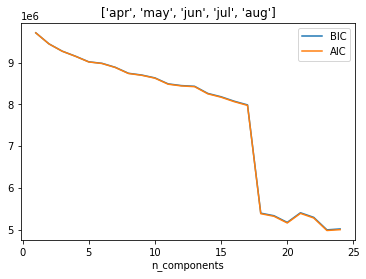

In [40]:
# AIC and BIC analysis

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from tqdm import tqdm

x_train,x_test,y_train,y_test= train_test_split(df3_converted[columns],df3_converted['label'], test_size=0.33,shuffle=False)

# find best components
n_components = np.arange(1, 25)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(x_train)
          for n in tqdm(n_components)]

plt.plot(n_components, [m.bic(x_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.title(month)
plt.xlabel('n_components');

100%|█████████████████████████████████████████████████████████████████████████████| 58/58 [26:07:10<00:00, 1621.22s/it]


Text(0, 0.5, 'score')

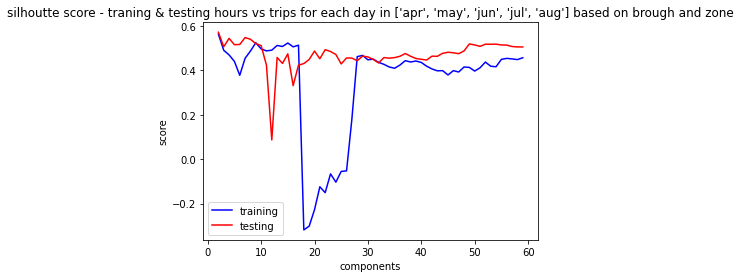

In [41]:
# ! warnining this cell takes more than 20 hrs to run and display the plot
# Training and Testing silhouette scores

from sklearn.metrics import silhouette_score

x_train,x_test,y_train,y_test= train_test_split(df3_converted[columns],df3_converted['label'], test_size=0.33,shuffle=False)

n_components = np.arange(2,60)
train_score = []
test_score = []
for cmp in tqdm(n_components):
    model = GaussianMixture(n_components=cmp,covariance_type='full',max_iter=500,random_state=42).fit(x_train)

    train_score.append(silhouette_score(x_train, model.fit_predict(x_train)))
    test_score.append(silhouette_score(x_test, model.fit_predict(x_test)))

 
plt.plot(n_components,train_score,color='b')
plt.plot(n_components,test_score,color='r')
plt.legend(["training","testing"])
plt.title(f"silhoutte score - traning & testing hours vs trips for each day in {month} based on brough and zone")
plt.xlabel('components')
plt.ylabel('score')

Training score : -0.3186685514647083
Testing score : 0.43080583379004594


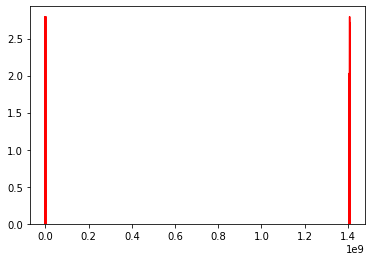

In [44]:
# GMM - model 3

x_train,x_test,y_train,y_test= train_test_split(df3_converted[columns],df3_converted['label'], test_size=0.33,shuffle=False)
model = GaussianMixture(n_components=18,covariance_type='full',max_iter=100,random_state=42)
model.fit(x_train)

model.fit_predict(x_test)
density = np.exp(model.score_samples(x_test))
plt.hist(x_test, 80, density=True, alpha=0.5)
plt.plot(x_test, density, '-r')

from sklearn.metrics import accuracy_score,silhouette_score 

print(f"Training score : {silhouette_score(x_train, model.fit_predict(x_train))}")
print(f"Testing score : {silhouette_score(x_test, model.fit_predict(x_test))}")